# EDA Analisis

## Import Libraries:

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


## Input cleaned Csvs.

In [177]:
coin_id_df = pd.read_csv('../Csvs_cleanned/coin_id.csv')
coins_global_trends_df = pd.read_csv('../Csvs_cleanned/coins_global_trends.csv')
# normalized_tickers_resume_df = pd.read_csv('../Csvs_cleanned/normalized_tickers_resume.csv')
ohlc_prices_df = pd.read_csv('../Csvs_cleanned/ohlc_prices.csv')
prices_df = pd.read_csv('../Csvs_cleanned/prices.csv')
# prices_normalized_df = pd.read_csv('../Csvs_cleanned/prices_normalized.csv')
ranking_coingecko_df = pd.read_csv('../Csvs_cleanned/ranking_coingecko.csv')
tickers_resume_df = pd.read_csv('../Csvs_cleanned/tickers_resume.csv')
top_criptos_df = pd.read_csv('../Csvs_cleanned/top_criptos.csv')

### coin_id_df:

In [178]:
coin_id_df.head(15)

,crip_id,symbol,name
0,apecoin,ape,apecoin
1,apemove,ape,apemove
2,arbitrum,arb,arbitrum
3,arb-protocol,arb,arb protocol
4,binancecoin,bnb,bnb
5,binance-coin-wormhole,bnb,binance coin (wormhole)
6,binance-peg-cardano,ada,binance-peg cardano
7,binance-peg-dogecoin,doge,binance-peg dogecoin
8,binance-peg-xrp,xrp,binance-peg xrp
9,bitcoin,btc,bitcoin


### coins_global_trends_df:

In [179]:
coins_global_trends_df.head(15)

,crip_id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,apecoin,24383,apecoin,ape,68,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,apecoin,0.000057,0
1,opulous,16548,opulous,opul,652,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,opulous,0.000003,1
2,fsn,2515,fusion,fsn,748,https://assets.coingecko.com/coins/images/2515...,https://assets.coingecko.com/coins/images/2515...,https://assets.coingecko.com/coins/images/2515...,fusion,0.000008,2
3,sei-network,28205,sei,sei,119,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,3
4,bitrock,30987,bitrock,brock,745,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,0.000006,4
5,unibot,30462,unibot,unibot,210,https://assets.coingecko.com/coins/images/3046...,https://assets.coingecko.com/coins/images/3046...,https://assets.coingecko.com/coins/images/3046...,unibot,0.004799,5
6,arbitrum,16547,arbitrum,arb,39,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,arbitrum,0.000037,6
7,worldcoin-wld,31069,worldcoin,wld,165,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000055,7


In [180]:
coins_global_trends_df = coins_global_trends_df[['crip_id','name','market_cap_rank','price_btc','score']]

In [181]:
# Ordenar el DataFrame por la columna 'score' de manera descendente
sorted_coins_global_trends_df = coins_global_trends_df.sort_values(by='score', ascending=True)


In [182]:
sorted_coins_global_trends_df

,crip_id,name,market_cap_rank,price_btc,score
0,apecoin,apecoin,68,0.000057,0
1,opulous,opulous,652,0.000003,1
2,fsn,fusion,748,0.000008,2
3,sei-network,sei,119,0.000006,3
4,bitrock,bitrock,745,0.000006,4
5,unibot,unibot,210,0.004799,5
6,arbitrum,arbitrum,39,0.000037,6
7,worldcoin-wld,worldcoin,165,0.000055,7


### ohlc_prices_df:

Debe conbinarce con price

In [183]:
ohlc_prices_df.head(15)

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,2023-07-24 00:00:00,0.07493,0.07528,0.07475,0.07504,opulous
1,2023-07-24 04:00:00,0.07491,0.07494,0.07480,0.07480,opulous
2,2023-07-24 08:00:00,0.07537,0.07541,0.07502,0.07523,opulous
3,2023-07-24 12:00:00,0.07511,0.07547,0.07511,0.07530,opulous
4,2023-07-24 16:00:00,0.07540,0.07583,0.07540,0.07583,opulous
5,2023-07-24 20:00:00,0.07553,0.07553,0.07486,0.07520,opulous
6,2023-07-25 00:00:00,0.07577,0.07577,0.07546,0.07556,opulous
7,2023-07-25 04:00:00,0.07532,0.07560,0.07532,0.07540,opulous
8,2023-07-25 08:00:00,0.07537,0.07537,0.07392,0.07392,opulous
9,2023-07-25 12:00:00,0.07396,0.07487,0.07375,0.07487,opulous


In [184]:
ohlc_prices_df.shape

(6772, 6)

### prices_df:

In [185]:
prices_df.head(15)

,crip_id,timestamp,price,market_cap,total_volume
0,opulous,2023-03-13 00:00:00,0.14786,33683468.0,794042.06
1,opulous,2023-03-14 00:00:00,0.17164,38958876.0,1114396.20
2,opulous,2023-03-15 00:00:00,0.18581,42926170.0,1617865.90
3,opulous,2023-03-16 00:00:00,0.17029,39010860.0,892111.40
4,opulous,2023-03-17 00:00:00,0.17763,40900210.0,677446.60
5,opulous,2023-03-18 00:00:00,0.19012,43564980.0,1461678.40
6,opulous,2023-03-19 00:00:00,0.18000,41325424.0,830367.30
7,opulous,2023-03-20 00:00:00,0.19185,43923770.0,1129826.60
8,opulous,2023-03-21 00:00:00,0.18849,43250852.0,900667.50
9,opulous,2023-03-22 00:00:00,0.19171,43989788.0,703439.20


In [186]:
prices_df.shape

(5399, 5)

In [187]:
# sns.pairplot(prices_df, hue='crip_id')

## Merged Ohlc_prices_df y Prices_df:

In [188]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df = pd.merge(ohlc_prices_df, prices_df, on=['crip_id', 'timestamp'])

In [189]:
merged_df_ohlc_prices_df_and_prices_df = merged_df_ohlc_prices_df_and_prices_df[['crip_id','timestamp','open_price','high_price','low_price','close_price','price','market_cap','total_volume']]

In [190]:
merged_df_ohlc_prices_df_and_prices_df.head(10)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume
0,opulous,2023-07-24 00:00:00,0.07493,0.07528,0.07475,0.07504,0.07491,18300926.0,577147.70
1,opulous,2023-07-25 00:00:00,0.07577,0.07577,0.07546,0.07556,0.07532,18507524.0,623108.56
2,opulous,2023-07-26 00:00:00,0.07323,0.07510,0.07323,0.07510,0.07489,18401586.0,596936.75
3,opulous,2023-07-27 00:00:00,0.07491,0.07518,0.07395,0.07428,0.07422,18266826.0,558539.50
4,opulous,2023-07-28 00:00:00,0.07712,0.07754,0.07707,0.07754,0.07761,19796982.0,1037756.20
5,opulous,2023-07-29 00:00:00,0.07578,0.07642,0.07565,0.07642,0.07642,19500920.0,519372.66
6,opulous,2023-07-30 00:00:00,0.07625,0.07783,0.07625,0.07783,0.07760,19940252.0,565463.75
7,opulous,2023-07-31 00:00:00,0.07740,0.07752,0.07709,0.07752,0.07734,19656958.0,602597.10
8,opulous,2023-08-01 00:00:00,0.07749,0.07749,0.07662,0.07662,0.07742,19659238.0,602980.06
9,opulous,2023-08-02 00:00:00,0.07667,0.07667,0.07607,0.07624,0.07603,19390970.0,616807.75


In [191]:
merged_df_ohlc_prices_df_and_prices_df.shape

(1128, 9)

In [192]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df,hue='crip_id')

### Guardo merged_df_ohlc_prices_df_and_prices_df:

In [193]:
merged_df_ohlc_prices_df_and_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_df_ohlc_prices_df_and_prices_df.csv', mode='w', index=False)

### merged_df_ohlc_prices_df_and_prices_df % :

In [194]:
# Calculate percentage change for the specified columns
percentage_columns = ["open_price", "high_price", "low_price", "close_price", "price", 'market_cap', 'total_volume']
for col in percentage_columns:
    col_name = f"{col}_change"
    merged_df_ohlc_prices_df_and_prices_df[col_name] = merged_df_ohlc_prices_df_and_prices_df[col].pct_change() * 100

# Display the resulting DataFrame
print(merged_df_ohlc_prices_df_and_prices_df.head(10))


   crip_id            timestamp  open_price  high_price  low_price  close_price    price  market_cap  total_volume  open_price_change  high_price_change  low_price_change  close_price_change  price_change  market_cap_change  total_volume_change
0  opulous  2023-07-24 00:00:00     0.07493     0.07528    0.07475      0.07504  0.07491  18300926.0     577147.70                NaN                NaN               NaN                 NaN           NaN                NaN                  NaN
1  opulous  2023-07-25 00:00:00     0.07577     0.07577    0.07546      0.07556  0.07532  18507524.0     623108.56           1.121046           0.650903          0.949833            0.692964      0.547323           1.128894             7.963449
2  opulous  2023-07-26 00:00:00     0.07323     0.07510    0.07323      0.07510  0.07489  18401586.0     596936.75          -3.352250          -0.884255         -2.955208           -0.608788     -0.570898          -0.572405            -4.200201
3  opulous  2023-07-

In [195]:
# Display the resulting DataFrame
merged_df_ohlc_prices_df_and_prices_df.shape

(1128, 16)

### ranking_coingecko_df:

In [196]:
ranking_coingecko_df.head(15)

,crip_id,asset_platform_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,public_notice
0,opulous,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.000,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
1,tether,ethereum,0,31.25,68.75,284137,3.0,150.0,41.416,0.000,10.685,101.651,0.029,2023-08-22 19:40:00.431000+00:00,tether announced the ending of the support of ...
2,bitcoin,NaN,10,65.95,34.05,1331507,1.0,1.0,83.151,99.241,83.341,100.011,0.073,2023-08-22 19:40:06.039000+00:00,NaN
3,ethereum,NaN,0,57.25,42.75,1193699,2.0,2.0,78.783,97.494,72.746,95.183,0.236,2023-08-22 19:39:25.497000+00:00,NaN
4,staked-ether,ethereum,0,50.00,50.00,13094,7.0,253.0,34.763,0.000,33.667,52.515,0.023,2023-08-22 19:39:57.913000+00:00,NaN
5,apecoin,ethereum,0,47.44,52.56,92439,67.0,310.0,32.451,0.000,10.909,70.167,0.009,2023-08-22 19:40:02.890000+00:00,NaN
6,cardano,NaN,0,70.19,29.81,724715,8.0,7.0,62.536,70.270,58.753,72.124,0.023,2023-08-22 19:39:28.582000+00:00,NaN
7,arb-protocol,solana,0,100.00,0.00,832,NaN,6172.0,1.624,0.000,6.473,1.000,0.000,2023-08-22 19:40:09.065000+00:00,NaN
8,bitrock,ethereum,0,98.39,1.61,2451,748.0,NaN,0.000,0.000,0.000,0.000,0.000,2023-08-22 19:40:10.931000+00:00,NaN
9,heco-peg-xrp,huobi-token,0,NaN,NaN,116,NaN,6573.0,0.201,0.000,0.000,1.000,0.022,2023-08-22 19:39:28.028000+00:00,NaN


In [197]:
ranking_coingecko_df.shape

(44, 15)

In [198]:
# sns.pairplot(ranking_coingecko_df,hue='crip_id')

#### Merged with ranking_congecko_df: Solo se puede por crip_id

In [199]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = pd.merge(merged_df_ohlc_prices_df_and_prices_df, ranking_coingecko_df, on=['crip_id'])

In [200]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(15)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,asset_platform_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,public_notice
0,opulous,2023-07-24 00:00:00,0.07493,0.07528,0.07475,0.07504,0.07491,18300926.0,577147.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
1,opulous,2023-07-25 00:00:00,0.07577,0.07577,0.07546,0.07556,0.07532,18507524.0,623108.56,1.121046,0.650903,0.949833,0.692964,0.547323,1.128894,7.963449,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
2,opulous,2023-07-26 00:00:00,0.07323,0.07510,0.07323,0.07510,0.07489,18401586.0,596936.75,-3.352250,-0.884255,-2.955208,-0.608788,-0.570898,-0.572405,-4.200201,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
3,opulous,2023-07-27 00:00:00,0.07491,0.07518,0.07395,0.07428,0.07422,18266826.0,558539.50,2.294142,0.106525,0.983204,-1.091877,-0.894645,-0.732328,-6.432382,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
4,opulous,2023-07-28 00:00:00,0.07712,0.07754,0.07707,0.07754,0.07761,19796982.0,1037756.20,2.950207,3.139133,4.219067,4.388799,4.567502,8.376693,85.798175,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
5,opulous,2023-07-29 00:00:00,0.07578,0.07642,0.07565,0.07642,0.07642,19500920.0,519372.66,-1.737552,-1.444416,-1.842481,-1.444416,-1.533308,-1.495491,-49.952343,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
6,opulous,2023-07-30 00:00:00,0.07625,0.07783,0.07625,0.07783,0.07760,19940252.0,565463.75,0.620216,1.845067,0.793126,1.845067,1.544098,2.252878,8.874377,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
7,opulous,2023-07-31 00:00:00,0.07740,0.07752,0.07709,0.07752,0.07734,19656958.0,602597.10,1.508197,-0.398304,1.101639,-0.398304,-0.335052,-1.420714,6.566884,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
8,opulous,2023-08-01 00:00:00,0.07749,0.07749,0.07662,0.07662,0.07742,19659238.0,602980.06,0.116279,-0.038700,-0.609677,-1.160991,0.103439,0.011599,0.063552,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
9,opulous,2023-08-02 00:00:00,0.07667,0.07667,0.07607,0.07624,0.07603,19390970.0,616807.75,-1.058201,-1.058201,-0.717828,-0.495954,-1.795402,-1.364590,2.293225,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN


In [202]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.shape

(1188, 30)

In [203]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [204]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,asset_platform_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,public_notice
0,opulous,2023-07-24 00:00:00,0.07493,0.07528,0.07475,0.07504,0.07491,18300926.0,577147.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
1,opulous,2023-07-25 00:00:00,0.07577,0.07577,0.07546,0.07556,0.07532,18507524.0,623108.56,1.121046,0.650903,0.949833,0.692964,0.547323,1.128894,7.963449,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
2,opulous,2023-07-26 00:00:00,0.07323,0.07510,0.07323,0.07510,0.07489,18401586.0,596936.75,-3.352250,-0.884255,-2.955208,-0.608788,-0.570898,-0.572405,-4.200201,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
3,opulous,2023-07-27 00:00:00,0.07491,0.07518,0.07395,0.07428,0.07422,18266826.0,558539.50,2.294142,0.106525,0.983204,-1.091877,-0.894645,-0.732328,-6.432382,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
4,opulous,2023-07-28 00:00:00,0.07712,0.07754,0.07707,0.07754,0.07761,19796982.0,1037756.20,2.950207,3.139133,4.219067,4.388799,4.567502,8.376693,85.798175,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.0,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN


In [161]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.drop_duplicates()

In [162]:
# Contar la cantidad de veces que aparece cada valor único en 'Columna'
count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df['crip_id'].value_counts()

In [167]:
print(count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df)

crip_id
bitcoin                              60
ethereum                             60
opulous                              30
solana                               30
tether                               30
usd-coin-pulsechain                  30
doge-on-pulsechain                   30
fsn                                  30
worldcoin                            30
arbitrum                             30
usd-coin-avalanche-bridged-usdc-e    30
sol-wormhole                         30
binance-peg-xrp                      30
binance-peg-dogecoin                 30
ethereum-wormhole                    30
unibot                               30
binance-coin-wormhole                30
tether-pulsechain                    30
wrapped-solana                       30
force-bridge-usdc                    30
staked-ether                         30
apecoin                              30
cardano                              30
arb-protocol                         30
bitrock                         

### tickers_resume_df:

In [21]:
tickers_resume_df.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,opul,usdt,0.075240,1.890682e+06,green,0.516556,2023-08-22 19:52:01,2023-08-22 19:52:01,2023-08-22 19:52:01,False,...,opulous,tether,kucoin,kucoin,0.000003,0.000046,0.075217,5.502457,87.280000,142211.00
1,opul,usdt,0.075430,3.696710e+05,green,1.065473,2023-08-22 19:52:04,2023-08-22 19:52:04,2023-08-22 19:52:04,False,...,opulous,tether,bitmart,bitmart,0.000003,0.000046,0.075499,1.079890,17.129122,27910.00
2,opul,usdt,0.075400,2.626204e+05,green,0.398936,2023-08-22 19:44:33,2023-08-22 19:44:33,2023-08-22 19:53:58,False,...,opulous,tether,huobi,huobi,0.000003,0.000046,0.075409,0.754182,11.964504,19476.33
3,opul,usdt,0.075276,3.156425e+06,green,0.524934,2023-08-22 19:52:57,2023-08-22 19:52:57,2023-08-22 19:52:57,False,...,opulous,tether,gate.io,gate,0.000003,0.000046,0.075345,8.893310,141.065000,229848.00
4,opul,eth,0.000046,7.863833e+04,green,1.594181,2023-08-22 19:52:57,2023-08-22 19:52:57,2023-08-22 19:52:57,False,...,opulous,ethereum,gate.io,gate,0.000003,0.000046,0.075402,0.215969,3.425682,5581.72
5,opul,usdt,0.075250,7.410871e+05,green,0.809341,2023-08-22 19:52:24,2023-08-22 19:52:24,2023-08-22 19:52:24,False,...,opulous,tether,mexc,mxc,0.000003,0.000046,0.075319,2.159711,34.257159,55818.00
6,opul,usdt,0.076200,1.896505e+06,green,3.329065,2023-08-22 19:51:51,2023-08-22 19:51:51,2023-08-22 19:51:51,False,...,opulous,tether,ascendex (bitmax),bitmax,0.000003,0.000047,0.076181,5.589826,88.628000,144478.00
7,opul,usdt,0.074744,8.880632e+04,green,0.555080,2023-08-22 19:53:56,2023-08-22 19:53:56,2023-08-22 19:53:56,False,...,opulous,tether,coinex,coinex,0.000003,0.000046,0.074753,0.249729,3.961750,6449.10
8,opul,usdt,0.075860,5.998548e+04,green,0.487540,2023-08-22 19:54:09,2023-08-22 19:54:09,2023-08-22 19:54:09,False,...,opulous,tether,tarmex,tarmex,0.000003,0.000047,0.075862,0.167267,2.652342,4319.18
9,0x80d55c03180349fff4a229102f62328220a96444,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.076616,2.723416e+05,yellow,0.603821,2023-08-22 17:32:12,2023-08-22 17:32:12,2023-08-22 19:53:18,False,...,opulous,usd-coin,uniswap v2 (ethereum),uniswap_v2,0.000003,0.000047,0.076629,0.786986,12.484913,20323.00


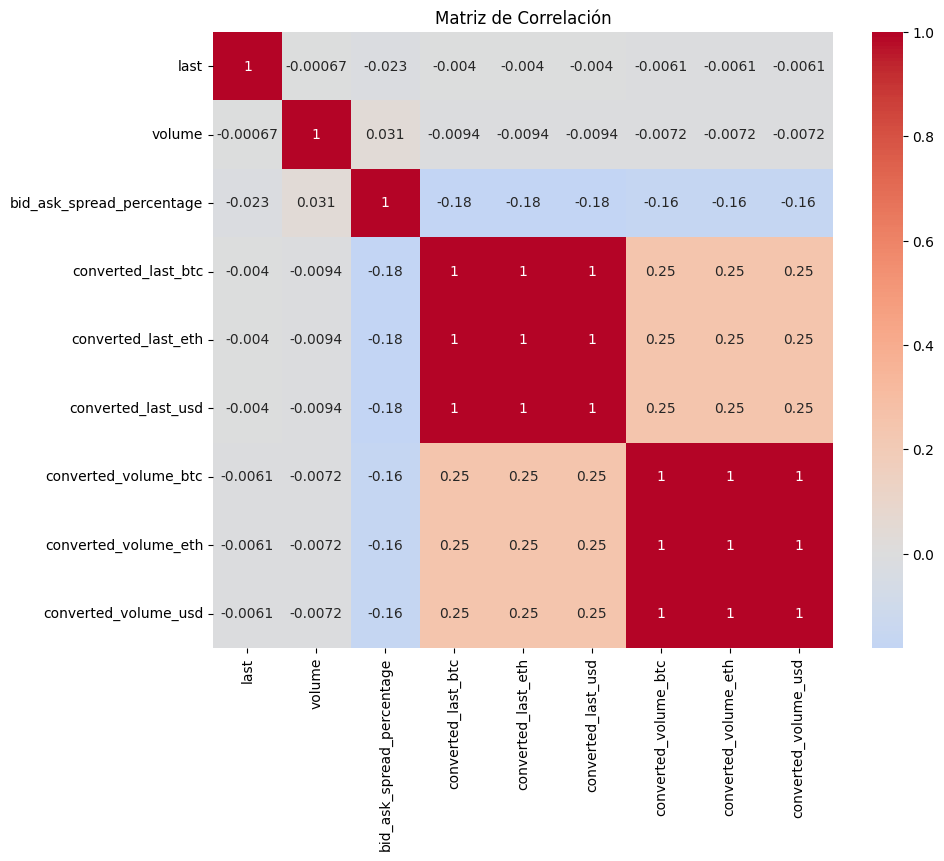

In [22]:
numeric_columns = tickers_resume_df.select_dtypes(include=['float64', 'int64','int32','float32'])  # Seleccionar solo columnas numéricas
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


### top_criptos_df:

In [23]:
top_criptos_df.head(15)

,crip_id,market_cap_percentage,total_market_cap,total_volume
0,btc,46.557419,4.180860e+07,1.337321e+06
1,eth,18.149895,6.625831e+08,2.119388e+07
2,bnb,2.967622,5.185562e+09,1.658693e+08
3,xrp,2.503501,2.111788e+12,6.754921e+10


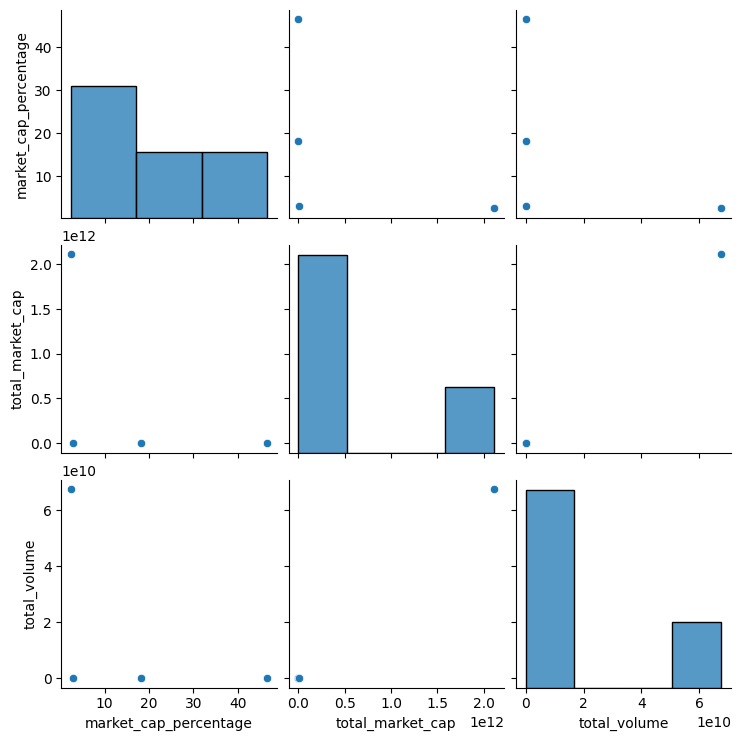

In [24]:
sns.pairplot(top_criptos_df)